In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


ENCODING CATEGORICAL VARIABLE AND SEPERATING DATE AND TIME

In [7]:
data['holiday'] = pd.Categorical(data['holiday']).codes
data['weather_main'] = pd.Categorical(data['weather_main']).codes
data['weather_description'] = pd.Categorical(data['weather_description']).codes
data['year'] = data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[0]))
data['month'] = data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[1]))
data['day'] = data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[2]))
data['hour'] = data['date_time'].map(lambda x: int(x.split(" ")[1].split(":")[0]))

data.drop(['date_time'], axis=1, inplace=True)


In [8]:
y = data['traffic_volume']

In [9]:
X = data.copy(deep=True)
X.drop(['traffic_volume'], inplace=True, axis=1)

In [10]:
print(X)

       holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0            7  288.28      0.0      0.0          40             1   
1            7  289.36      0.0      0.0          75             1   
2            7  289.58      0.0      0.0          90             1   
3            7  290.13      0.0      0.0          90             1   
4            7  291.14      0.0      0.0          75             1   
...        ...     ...      ...      ...         ...           ...   
48199        7  283.45      0.0      0.0          75             1   
48200        7  282.76      0.0      0.0          90             1   
48201        7  282.73      0.0      0.0          90            10   
48202        7  282.09      0.0      0.0          90             1   
48203        7  282.12      0.0      0.0          90             1   

       weather_description  year  month  day  hour  
0                       24  2012     10    2     9  
1                        2  2012     10    2    10  


In [11]:
print(y)

0        5545
1        4516
2        4767
3        5026
4        4918
         ... 
48199    3543
48200    2781
48201    2159
48202    1450
48203     954
Name: traffic_volume, Length: 48204, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
print(X_train)

       holiday     temp  rain_1h  snow_1h  clouds_all  weather_main  \
28201        7  275.090      0.0      0.0          90             3   
33418        7  283.210      0.0      0.0          40             1   
28470        7  273.420      0.0      0.0           1             5   
6757         7  285.180      0.0      0.0          92             1   
27175        7  277.572      0.0      0.0           0             0   
...        ...      ...      ...      ...         ...           ...   
21243        7  260.480      0.0      0.0           1             0   
45891        7  291.080      0.0      0.0           1             0   
42613        7  277.080      0.0      0.0          40             1   
43567        7  276.880      0.0      0.0           1             0   
2732         7  264.070      0.0      0.0           1             0   

       weather_description  year  month  day  hour  
28201                    5  2016     11   18    14  
33418                   24  2017      5  

In [14]:
print(X_test)

       holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
44287        7  286.72     0.00      0.0          75             5   
2006         7  267.93     0.00      0.0          40             4   
6582         7  290.99     0.00      0.0          90            10   
13779        7  291.29     0.38      0.0          90             6   
1721         7  274.88     0.00      0.0           1             0   
...        ...     ...      ...      ...         ...           ...   
3007         7  264.32     0.00      0.0           1             0   
36478        7  290.87     0.00      0.0          75             6   
1239         7  279.24     0.00      0.0           1             0   
29546        7  268.48     0.00      0.0           5             0   
9843         7  275.89     0.00      0.0          75             1   

       weather_description  year  month  day  hour  
44287                   17  2018      5   22     6  
2006                     7  2012     12   14    20  


In [15]:
print(y_train)

28201    4694
33418     443
28470    1358
6757      453
27175    2610
         ... 
21243    5858
45891     935
42613    4447
43567     341
2732      248
Name: traffic_volume, Length: 36153, dtype: int64


In [16]:
print(y_test)

44287    5875
2006     2868
6582      557
13779    4354
1721      783
         ... 
3007     2646
36478    6844
1239     3522
29546    5730
9843      839
Name: traffic_volume, Length: 12051, dtype: int64


CHECKING RANDOM FOREST REGRESSION

In [22]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [23]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error,r2_score
import matplotlib.pyplot as plt
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("INITIAL DATA REPRESENTATION\t")
print("R2 score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

INITIAL DATA REPRESENTATION	
R2 score: 0.8178619183012165
MAE: 531.2294415401211
MSE: 711060.8732802257
RMSE: 843.2442548160204


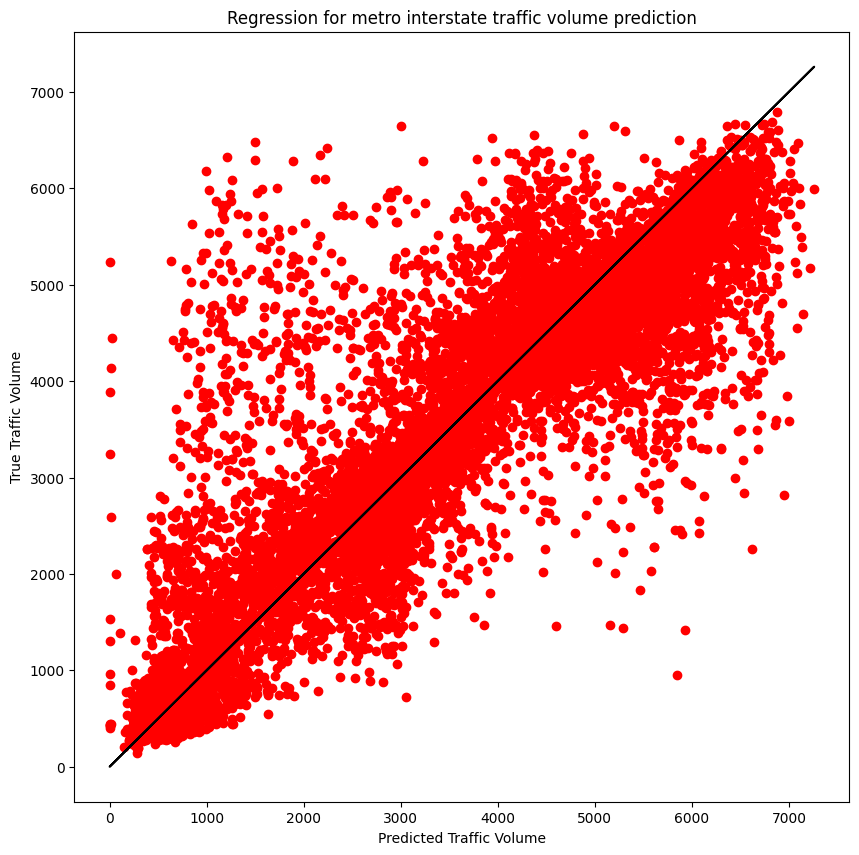

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred,color = "red",label = "Scatter")
plt.plot(y_test,y_test,color = "black",label = "Regression")
plt.xlabel("Predicted Traffic Volume")
plt.ylabel("True Traffic Volume")
plt.title('Regression for metro interstate traffic volume prediction')
plt.show()